In [26]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import csv
import math

In [27]:
import seaborn as sns

In [28]:
import matplotlib

In [30]:
airline_df = pd.read_csv("airline.csv")
airline_df.head()

,ActualElapsedTime,AirTime,ArrDelay,ArrTime,CRSArrTime,CRSDepTime,CRSElapsedTime,CancellationCode,Cancelled,CarrierDelay,...,Month,NASDelay,Origin,SecurityDelay,TailNum,TaxiIn,TaxiOut,UniqueCarrier,WeatherDelay,Year
0,154.0,122.0,90.0,1850.0,1720,1455,145.0,NaN,0,0.0,...,6,23.0,ORD,0.0,N293AA,8.0,24.0,AA,0.0,2006
1,159.0,125.0,59.0,1703.0,1604,1510,114.0,NaN,0,NaN,...,9,NaN,DTW,NaN,N8921E,19.0,15.0,NW,NaN,1997
2,NaN,71.0,NaN,NaN,1140,1037,63.0,NaN,1,NaN,...,2,NaN,CVG,NaN,N331DL,4.0,15.0,DL,NaN,1995
3,70.0,NaN,80.0,20.0,2300,2100,60.0,NaN,0,NaN,...,2,NaN,MDW,NaN,NaN,NaN,NaN,ML (1),NaN,1991
4,150.0,135.0,5.0,2030.0,2025,1740,165.0,NaN,0,NaN,...,2,NaN,PHL,NaN,N512AU,3.0,12.0,US,NaN,1997


In [ ]:
airline_df.shape

## Cleaning data in 3 steps:
old:
<br>Step 1: Dropping rows with faulty timings
<br>Step 2: Creating a new column with proper date and dropping other columns about date
<br>Step 3: Categorise the airports according to states


## 1. EDA for flights with no cancellation

In [41]:
# Before dropping the rows with faulty timings
max_values = airline_df.max()
max_values

C:\Users\HP\AppData\Local\Temp/ipykernel_20320/3002589090.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  max_values = airline_df.max()


ActualElapsedTime    1849.0
AirTime              1920.0
ArrDelay             1622.0
ArrTime              2835.0
CRSArrTime             2400
CRSDepTime             2400
CRSElapsedTime       1440.0
Cancelled                 1
CarrierDelay         1529.0
DayOfWeek                 7
DayofMonth               31
DepDelay             1529.0
DepTime              2648.0
Dest                    YUM
Distance             4983.0
Diverted                  1
FlightNum              9901
LateAircraftDelay    1254.0
Month                    12
NASDelay             1368.0
Origin                  YUM
SecurityDelay         263.0
TaxiIn               1488.0
TaxiOut              1439.0
UniqueCarrier            YV
WeatherDelay         1510.0
Year                   2008
dtype: object

In [42]:
airline_df_cleaned = airline_df[(airline_df['ArrTime'] <= 2400) & (airline_df['DepTime'] <= 2400)]
airline_df_cleaned

(9674807, 29)

In [43]:
airline_df_faulty_timings = airline_df[(airline_df['ArrTime'] > 2400) & (airline_df['DepTime'] > 2400)]
airline_df_faulty_timings['UniqueCarrier'].unique()

array(['EV'], dtype=object)

Since the faulty values only affect a particular airline, aka EV, then dropping 2.1% of the original data with faulty timings should not be a big problem.

In [45]:
# After dropping the rows with faulty timings
max_values = airline_df_cleaned.max()
max_values

C:\Users\HP\AppData\Local\Temp/ipykernel_20320/3489266257.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  max_values = airline_df_cleaned.max()


ActualElapsedTime    1849.0
AirTime              1920.0
ArrDelay             1622.0
ArrTime              2400.0
CRSArrTime             2400
CRSDepTime             2400
CRSElapsedTime       1440.0
CancellationCode       None
Cancelled                 0
CarrierDelay         1529.0
DayOfWeek                 7
DayofMonth               31
DepDelay             1529.0
DepTime              2400.0
Dest                    YUM
Distance             4983.0
Diverted                  1
FlightNum              9899
LateAircraftDelay    1254.0
Month                    12
NASDelay             1368.0
Origin                  YUM
SecurityDelay         263.0
TaxiIn               1439.0
TaxiOut              1439.0
UniqueCarrier            YV
WeatherDelay         1510.0
Year                   2008
dtype: object

In [46]:
## Checking to see if timings for ArrTime and DepTime are possibly negative
min_values = airline_df_cleaned.min()
min_values

C:\Users\HP\AppData\Local\Temp/ipykernel_20320/303487072.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  min_values = airline_df_cleaned.min()


ActualElapsedTime    -280.0
AirTime             -2687.0
ArrDelay            -1252.0
ArrTime                 1.0
CRSArrTime                0
CRSDepTime                0
CRSElapsedTime       -141.0
CancellationCode       None
Cancelled                 0
CarrierDelay            0.0
DayOfWeek                 1
DayofMonth                1
DepDelay            -1200.0
DepTime                 1.0
Dest                    ABE
Distance               11.0
Diverted                  0
FlightNum                 1
LateAircraftDelay       0.0
Month                     1
NASDelay               -5.0
Origin                  ABE
SecurityDelay           0.0
TaxiIn                  0.0
TaxiOut                 0.0
UniqueCarrier            9E
WeatherDelay            0.0
Year                   1987
dtype: object

In [47]:
num_cancelled_flights = airline_df_cleaned[airline_df_cleaned['Cancelled'] != 0].shape[0]
total_flights = airline_df_cleaned.shape[0]
proportion_cancelled = round(num_cancelled_flights / total_flights, 5)

However, this also dropped columns with ArrTime/DepTime as NaN due to cancelled flights.

In [48]:
print (f"Percentage of cancelled flights: {proportion_cancelled * 100}% from a total of {total_flights} flights")

Percentage of cancelled flights: 0.0% from a total of 9674807 flights


### Step 2: Creating a date column

In [55]:
# Convert the date to the desired format (DD/MM/YYYY)
airline_df_cleaned['Date'] = pd.to_datetime(dict(year=airline_df_cleaned['Year'], month=airline_df_cleaned['Month'] , day=airline_df_cleaned['DayofMonth']))
# airline_df_cleaned['Date'] = airline_df_cleaned['Date'].dt.strftime('%d/%m/%Y')

# Print the DataFrame with the combined date column
airline_df_cleaned

C:\Users\HP\AppData\Local\Temp/ipykernel_20320/1671093422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline_df_cleaned['Date'] = pd.to_datetime(dict(year=airline_df_cleaned['Year'], month=airline_df_cleaned['Month'] , day=airline_df_cleaned['DayofMonth']))
C:\Users\HP\AppData\Local\Temp/ipykernel_20320/1671093422.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline_df_cleaned['Date'] = airline_df_cleaned['Date'].dt.strftime('%d/%m/%Y')


,ActualElapsedTime,AirTime,ArrDelay,ArrTime,CRSArrTime,CRSDepTime,CRSElapsedTime,CancellationCode,Cancelled,CarrierDelay,...,NASDelay,Origin,SecurityDelay,TailNum,TaxiIn,TaxiOut,UniqueCarrier,WeatherDelay,Year,Date
0,154.0,122.0,90.0,1850.0,1720,1455,145.0,NaN,0,0.0,...,23.0,ORD,0.0,N293AA,8.0,24.0,AA,0.0,2006,21/06/2006
1,159.0,125.0,59.0,1703.0,1604,1510,114.0,NaN,0,NaN,...,NaN,DTW,NaN,N8921E,19.0,15.0,NW,NaN,1997,16/09/1997
3,70.0,NaN,80.0,20.0,2300,2100,60.0,NaN,0,NaN,...,NaN,MDW,NaN,NaN,NaN,NaN,ML (1),NaN,1991,05/02/1991
4,150.0,135.0,5.0,2030.0,2025,1740,165.0,NaN,0,NaN,...,NaN,PHL,NaN,N512AU,3.0,12.0,US,NaN,1997,01/02/1997
5,110.0,NaN,10.0,1450.0,1440,1300,100.0,NaN,0,NaN,...,NaN,BDL,NaN,NaN,NaN,NaN,CO,NaN,1989,21/02/1989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9882792,65.0,38.0,5.0,1835.0,1830,1720,70.0,NaN,0,NaN,...,NaN,DTW,NaN,89339E,5.0,22.0,9E,NaN,2008,02/10/2008
9882793,115.0,93.0,5.0,906.0,0,0,119.0,NaN,0,NaN,...,NaN,DFW,NaN,N579AA,9.0,13.0,AA,NaN,1997,25/12/1997
9882794,137.0,NaN,-10.0,708.0,718,550,148.0,NaN,0,NaN,...,NaN,MCO,NaN,NaN,NaN,NaN,DL,NaN,1992,30/08/1992
9882795,76.0,61.0,-4.0,736.0,740,620,80.0,NaN,0,NaN,...,NaN,ONT,NaN,N639@@,3.0,12.0,WN,NaN,2001,03/05/2001


In [57]:
airline_df_cleaned2 = airline_df_cleaned.drop(columns=['Year', 'Month', 'DayofMonth'], inplace=False)

In [58]:
airline_df_cleaned2

,ActualElapsedTime,AirTime,ArrDelay,ArrTime,CRSArrTime,CRSDepTime,CRSElapsedTime,CancellationCode,Cancelled,CarrierDelay,...,LateAircraftDelay,NASDelay,Origin,SecurityDelay,TailNum,TaxiIn,TaxiOut,UniqueCarrier,WeatherDelay,Date
0,154.0,122.0,90.0,1850.0,1720,1455,145.0,NaN,0,0.0,...,67.0,23.0,ORD,0.0,N293AA,8.0,24.0,AA,0.0,21/06/2006
1,159.0,125.0,59.0,1703.0,1604,1510,114.0,NaN,0,NaN,...,NaN,NaN,DTW,NaN,N8921E,19.0,15.0,NW,NaN,16/09/1997
3,70.0,NaN,80.0,20.0,2300,2100,60.0,NaN,0,NaN,...,NaN,NaN,MDW,NaN,NaN,NaN,NaN,ML (1),NaN,05/02/1991
4,150.0,135.0,5.0,2030.0,2025,1740,165.0,NaN,0,NaN,...,NaN,NaN,PHL,NaN,N512AU,3.0,12.0,US,NaN,01/02/1997
5,110.0,NaN,10.0,1450.0,1440,1300,100.0,NaN,0,NaN,...,NaN,NaN,BDL,NaN,NaN,NaN,NaN,CO,NaN,21/02/1989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9882792,65.0,38.0,5.0,1835.0,1830,1720,70.0,NaN,0,NaN,...,NaN,NaN,DTW,NaN,89339E,5.0,22.0,9E,NaN,02/10/2008
9882793,115.0,93.0,5.0,906.0,0,0,119.0,NaN,0,NaN,...,NaN,NaN,DFW,NaN,N579AA,9.0,13.0,AA,NaN,25/12/1997
9882794,137.0,NaN,-10.0,708.0,718,550,148.0,NaN,0,NaN,...,NaN,NaN,MCO,NaN,NaN,NaN,NaN,DL,NaN,30/08/1992
9882795,76.0,61.0,-4.0,736.0,740,620,80.0,NaN,0,NaN,...,NaN,NaN,ONT,NaN,N639@@,3.0,12.0,WN,NaN,03/05/2001


In [62]:
airline_df_cleaned2.sort_values(by='Date', inplace=True)

In [60]:
airline_df_cleaned2.shape

(9674807, 27)

In [63]:
airline_df_cleaned2

,ActualElapsedTime,AirTime,ArrDelay,ArrTime,CRSArrTime,CRSDepTime,CRSElapsedTime,CancellationCode,Cancelled,CarrierDelay,...,LateAircraftDelay,NASDelay,Origin,SecurityDelay,TailNum,TaxiIn,TaxiOut,UniqueCarrier,WeatherDelay,Date
4832635,19.0,NaN,-2.0,1404.0,1406,1345,21.0,NaN,0,NaN,...,NaN,NaN,BTM,NaN,NaN,NaN,NaN,DL,NaN,01/01/1988
3274631,49.0,NaN,-6.0,1359.0,1405,1310,55.0,NaN,0,NaN,...,NaN,NaN,PIT,NaN,NaN,NaN,NaN,US,NaN,01/01/1988
3328867,26.0,NaN,2.0,1536.0,1534,1510,24.0,NaN,0,NaN,...,NaN,NaN,LEX,NaN,NaN,NaN,NaN,DL,NaN,01/01/1988
6302871,31.0,NaN,-2.0,1253.0,1255,1225,30.0,NaN,0,NaN,...,NaN,NaN,ROC,NaN,NaN,NaN,NaN,PI,NaN,01/01/1988
2955537,161.0,NaN,19.0,1051.0,1032,910,142.0,NaN,0,NaN,...,NaN,NaN,SYR,NaN,NaN,NaN,NaN,TW,NaN,01/01/1988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950136,87.0,63.0,-5.0,749.0,754,630,84.0,NaN,0,NaN,...,NaN,NaN,ABE,NaN,N13123,15.0,9.0,XE,NaN,31/12/2008
2410507,87.0,47.0,48.0,2011.0,1923,1810,73.0,NaN,0,0.0,...,34.0,14.0,ROC,0.0,N952AT,7.0,33.0,FL,0.0,31/12/2008
9424555,141.0,116.0,-18.0,1022.0,1040,702,158.0,NaN,0,NaN,...,NaN,NaN,SEA,NaN,N597UA,10.0,15.0,UA,NaN,31/12/2008
2126840,189.0,173.0,-12.0,1508.0,1520,1055,205.0,NaN,0,NaN,...,NaN,NaN,PHX,NaN,N476WN,5.0,11.0,WN,NaN,31/12/2008


In [65]:
airline_df_cleaned2.to_csv("flights_without_cancellation_data2.csv", index=False)

## 2. EDA for cancelled flights

### Cleaning data in 2 steps:
Step 1: Dropping rows with faulty timings
<br>Step 2: Creating a new column with proper date and dropping other columns about date
<br>Step 3: Check how useful the cancelled flights data is

Note: Step 1 will result in cancelled flights being dropped due to null data.

In [66]:
cancelled_flights = airline_df[airline_df['Cancelled'] == 1]
cancelled_flights.head()

,ActualElapsedTime,AirTime,ArrDelay,ArrTime,CRSArrTime,CRSDepTime,CRSElapsedTime,CancellationCode,Cancelled,CarrierDelay,...,Month,NASDelay,Origin,SecurityDelay,TailNum,TaxiIn,TaxiOut,UniqueCarrier,WeatherDelay,Year
2,NaN,71.0,NaN,NaN,1140,1037,63.0,NaN,1,NaN,...,2,NaN,CVG,NaN,N331DL,4.0,15.0,DL,NaN,1995
32,NaN,NaN,NaN,NaN,1325,1325,60.0,NaN,1,NaN,...,2,NaN,DTW,NaN,NaN,NaN,NaN,WN,NaN,1988
51,NaN,NaN,NaN,NaN,2019,1810,69.0,NaN,1,NaN,...,5,NaN,BNA,NaN,N604DL,0.0,0.0,DL,NaN,1998
73,NaN,NaN,NaN,NaN,1748,1544,124.0,C,1,0.0,...,5,0.0,IAH,0.0,0,0.0,0.0,XE,0.0,2006
188,NaN,NaN,NaN,NaN,1622,1510,72.0,NaN,1,NaN,...,6,NaN,LGB,NaN,N901AW,0.0,0.0,HP,NaN,1996


### Step 1: Dropping rows where maximum timing exceeds 2400 or minimum timing is negative

In [67]:
# Before dropping the rows with faulty timings
max_values = cancelled_flights.max()
max_values

C:\Users\HP\AppData\Local\Temp/ipykernel_20320/4005738314.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  max_values = cancelled_flights.max()


ActualElapsedTime       NaN
AirTime               538.0
ArrDelay                NaN
ArrTime                 NaN
CRSArrTime             2400
CRSDepTime             2359
CRSElapsedTime        998.0
Cancelled                 1
CarrierDelay            0.0
DayOfWeek                 7
DayofMonth               31
DepDelay              527.0
DepTime              2353.0
Dest                    YUM
Distance             4962.0
Diverted                  0
FlightNum              9901
LateAircraftDelay       0.0
Month                    12
NASDelay                0.0
Origin                  YUM
SecurityDelay           0.0
TaxiIn                 93.0
TaxiOut              1056.0
UniqueCarrier            YV
WeatherDelay            0.0
Year                   2008
dtype: object

In [68]:
min_values = cancelled_flights.min()
min_values

C:\Users\HP\AppData\Local\Temp/ipykernel_20320/2507757866.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  min_values = cancelled_flights.min()


ActualElapsedTime     NaN
AirTime              10.0
ArrDelay              NaN
ArrTime               NaN
CRSArrTime              0
CRSDepTime              0
CRSElapsedTime      -38.0
Cancelled               1
CarrierDelay          0.0
DayOfWeek               1
DayofMonth              1
DepDelay            -11.0
DepTime               3.0
Dest                  ABE
Distance             11.0
Diverted                0
FlightNum               1
LateAircraftDelay     0.0
Month                   1
NASDelay              0.0
Origin                ABE
SecurityDelay         0.0
TaxiIn                0.0
TaxiOut               0.0
UniqueCarrier          9E
WeatherDelay          0.0
Year                 1987
dtype: object

### Step 2: Creating a date column

In [128]:
# Convert the date to the desired format (DD/MM/YYYY)
cancelled_flights['Date'] = pd.to_datetime(dict(year=cancelled_flights['Year'], month=cancelled_flights['Month'] , day=cancelled_flights['DayofMonth']))

# Print the DataFrame with the combined date column
cancelled_flights.sort_values(by='Date', inplace=True)
cancelled_flights2 = cancelled_flights.drop(columns=['Month', 'DayofMonth', 'DayOfWeek', 'ArrDelay', 'ArrTime', 'DepDelay', 'DepTime','AirTime', 'TaxiIn', 'TaxiOut'], inplace=False)
cancelled_flights2

C:\Users\HP\AppData\Local\Temp/ipykernel_20320/4005422170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancelled_flights['Date'] = pd.to_datetime(dict(year=cancelled_flights['Year'], month=cancelled_flights['Month'] , day=cancelled_flights['DayofMonth']))
C:\Users\HP\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,ActualElapsedTime,CRSArrTime,CRSDepTime,CRSElapsedTime,CancellationCode,Cancelled,CarrierDelay,Dest,Distance,Diverted,FlightNum,LateAircraftDelay,NASDelay,Origin,SecurityDelay,TailNum,UniqueCarrier,WeatherDelay,Year,Date
2843908,NaN,835,740,115.0,NaN,1,NaN,MSP,627.0,0,681,NaN,NaN,CMH,NaN,NaN,NW,NaN,1987,1987-10-01
5468046,NaN,2115,2000,75.0,NaN,1,NaN,LAX,337.0,0,2128,NaN,NaN,SFO,NaN,NaN,AA,NaN,1987,1987-10-01
115414,NaN,1450,1340,70.0,NaN,1,NaN,OAK,325.0,0,715,NaN,NaN,BUR,NaN,NaN,AS,NaN,1987,1987-10-01
2353276,NaN,1440,1355,105.0,NaN,1,NaN,MEM,622.0,0,881,NaN,NaN,CLE,NaN,NaN,NW,NaN,1987,1987-10-01
8504394,NaN,2359,2300,59.0,NaN,1,NaN,LAX,337.0,0,1436,NaN,NaN,SFO,NaN,NaN,PS,NaN,1987,1987-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4380761,NaN,2100,1935,85.0,B,1,NaN,SNA,404.0,0,1963,NaN,NaN,SMF,NaN,N207WN,WN,NaN,2008,2008-12-31
8917681,NaN,758,636,82.0,B,1,NaN,LAS,258.0,0,5706,NaN,NaN,FAT,NaN,N578SW,OO,NaN,2008,2008-12-31
2138630,NaN,1350,801,229.0,B,1,NaN,BOS,1754.0,0,744,NaN,NaN,DEN,NaN,NaN,UA,NaN,2008,2008-12-31
4175442,NaN,1340,1220,80.0,B,1,NaN,PHL,238.0,0,1511,NaN,NaN,PVD,NaN,N768SW,WN,NaN,2008,2008-12-31


### Step 3: Check how useful the cancelled flights data is

In [131]:
naCancellationCode = cancelled_flights2['CancellationCode'].isna().sum()
# print(naCancellationCode)

total_cancelled = cancelled_flights2.shape[0]
percentOfNaCancellationCode = naCancellationCode / total_cancelled * 100

print(f"Total flights: {total_cancelled}")
print(f"Total NaN data in Cancellation Code: {naCancellationCode}")
print(f"There is {round(percentOfNaCancellationCode, 2)}% of NaN in Cancellation Code out of total flights.")

Total flights: 184011
Total NaN data in Cancellation Code: 125408
There is 68.15% of NaN in Cancellation Code out of total flights.


In [132]:
# Checking which years with NaN data
unique_years_with_nan_cancelcode = cancelled_flights2[cancelled_flights2['CancellationCode'].notna()]['Year'].unique()
print(unique_years_with_nan_cancelcode)

[2003 2004 2005 2006 2007 2008]


In [133]:
# Narrowing cancelled flights to 2003 to 2008 
cancelled_flights_narrowed = cancelled_flights2[cancelled_flights2['Year'] >= 2003]
cancelled_flights_narrowed

,ActualElapsedTime,CRSArrTime,CRSDepTime,CRSElapsedTime,CancellationCode,Cancelled,CarrierDelay,Dest,Distance,Diverted,FlightNum,LateAircraftDelay,NASDelay,Origin,SecurityDelay,TailNum,UniqueCarrier,WeatherDelay,Year,Date
7762742,NaN,837,600,157.0,NaN,1,NaN,DFW,853.0,0,3734,NaN,NaN,MKE,NaN,NaN,MQ,NaN,2003,2003-01-01
7837371,NaN,1625,1306,139.0,NaN,1,NaN,DFW,868.0,0,544,NaN,NaN,PHX,NaN,N907AW,HP,NaN,2003,2003-01-01
9796041,NaN,1429,1345,44.0,NaN,1,NaN,ANC,160.0,0,61,NaN,NaN,CDV,NaN,000000,AS,NaN,2003,2003-01-01
4131313,NaN,2006,1958,68.0,NaN,1,NaN,STL,229.0,0,3147,NaN,NaN,IND,NaN,NaN,AA,NaN,2003,2003-01-01
7539804,NaN,941,835,126.0,NaN,1,NaN,SMF,647.0,0,763,NaN,NaN,PHX,NaN,N189AW,HP,NaN,2003,2003-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4380761,NaN,2100,1935,85.0,B,1,NaN,SNA,404.0,0,1963,NaN,NaN,SMF,NaN,N207WN,WN,NaN,2008,2008-12-31
8917681,NaN,758,636,82.0,B,1,NaN,LAS,258.0,0,5706,NaN,NaN,FAT,NaN,N578SW,OO,NaN,2008,2008-12-31
2138630,NaN,1350,801,229.0,B,1,NaN,BOS,1754.0,0,744,NaN,NaN,DEN,NaN,NaN,UA,NaN,2008,2008-12-31
4175442,NaN,1340,1220,80.0,B,1,NaN,PHL,238.0,0,1511,NaN,NaN,PVD,NaN,N768SW,WN,NaN,2008,2008-12-31


In [134]:
naCancellationCode2 = cancelled_flights_narrowed['CancellationCode'].isna().sum()
# print(naCancellationCode)

total_cancelled2 = cancelled_flights_narrowed.shape[0]
percentOfNaCancellationCode2 = naCancellationCode2 / total_cancelled2 * 100

print(f"Total flights from 2003 to 2008: {total_cancelled2}")
print(f"Total NaN data in Cancellation Code from 2003 to 2008: {naCancellationCode2}")
print(f"There is {round(percentOfNaCancellationCode2, 2)}% of NaN in Cancellation Code out of total flights from 2003 to 2008.")

Total flights from 2003 to 2008: 62521
Total NaN data in Cancellation Code from 2003 to 2008: 3918
There is 6.27% of NaN in Cancellation Code out of total flights from 2003 to 2008.


In [135]:
cancelled_flights_narrowed.to_csv("cancelled_flights_2003_to_2008.csv", index=False)

In [136]:
cancelled_flights2.to_csv("cancelled_flights.csv", index=False)

In [137]:
print(cancelled_flights2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184011 entries, 2843908 to 729662
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ActualElapsedTime  0 non-null       float64       
 1   CRSArrTime         184011 non-null  int64         
 2   CRSDepTime         184011 non-null  int64         
 3   CRSElapsedTime     182182 non-null  float64       
 4   CancellationCode   58603 non-null   object        
 5   Cancelled          184011 non-null  int64         
 6   CarrierDelay       47644 non-null   float64       
 7   Dest               184011 non-null  object        
 8   Distance           183849 non-null  float64       
 9   Diverted           184011 non-null  int64         
 10  FlightNum          184011 non-null  int64         
 11  LateAircraftDelay  47644 non-null   float64       
 12  NASDelay           47644 non-null   float64       
 13  Origin             184011 non-null  ob

In [96]:
print(cancelled_flights.duplicated().sum())

0


### 1. Analysing cancelled flights from 2003 to 2008
We will find out the following:
1. Distribution of cancelled flights across airlines
2. Distribution of cancelled flights across airlines across months in a year

From the data, we also noticed that the use of cancellation code is only implemented from 2003 onwards.

### Reason for cancellation (A = carrier, B = weather, C = NAS, D = security)

In [138]:
cancelcode_A = cancelled_flights_narrowed[cancelled_flights_narrowed['CancellationCode'] == 'A']
cancelcode_B = cancelled_flights_narrowed[cancelled_flights_narrowed['CancellationCode'] == 'B']
cancelcode_C = cancelled_flights_narrowed[cancelled_flights_narrowed['CancellationCode'] == 'C']
cancelcode_D = cancelled_flights_narrowed[cancelled_flights_narrowed['CancellationCode'] == 'D']

total = cancelled_flights.shape[0]
num_of_A = cancelcode_A.shape[0]
num_of_B = cancelcode_B.shape[0]
num_of_C = cancelcode_C.shape[0]
num_of_D = cancelcode_D.shape[0]

percent_A = num_of_A / total * 100
percent_B = num_of_B / total * 100
percent_C = num_of_C / total * 100
percent_D = num_of_D / total * 100

print(f"Carrier delay: {num_of_A} out of {total} flights. This is {round(percent_A, 2)}%")
print(f"Weather delay: {num_of_B} out of {total} flights. This is {round(percent_B, 2)}%")
print(f"NAS delay: {num_of_C} out of {total} flights. This is {round(percent_C, 2)}%")
print(f"Security delay: {num_of_D} out of {total} flights. This is {round(percent_D, 2)}%")

Carrier delay: 25291 out of 184011 flights. This is 13.74%
Weather delay: 21428 out of 184011 flights. This is 11.64%
NAS delay: 11845 out of 184011 flights. This is 6.44%
Security delay: 39 out of 184011 flights. This is 0.02%


In [65]:
cancelcode_A = airline_df[airline_df['CancellationCode'] == 'A']
cancelcode_B = airline_df[airline_df['CancellationCode'] == 'B']
cancelcode_C = airline_df[airline_df['CancellationCode'] == 'C']
cancelcode_D = airline_df[airline_df['CancellationCode'] == 'D']

total = cancelled_flights.shape[0]
num_of_A = cancelcode_A.shape[0]
num_of_B = cancelcode_B.shape[0]
num_of_C = cancelcode_C.shape[0]
num_of_D = cancelcode_D.shape[0]

percent_A = num_of_A / total * 100
percent_B = num_of_B / total * 100
percent_C = num_of_C / total * 100
percent_D = num_of_D / total * 100

print(f"Carrier delay: {num_of_A} out of {total} flights. This is {round(percent_A, 2)}%")
print(f"Weather delay: {num_of_B} out of {total} flights. This is {round(percent_B, 2)}%")
print(f"NAS delay: {num_of_C} out of {total} flights. This is {round(percent_C, 2)}%")
print(f"Security delay: {num_of_D} out of {total} flights. This is {round(percent_D, 2)}%")

Carrier delay: 25303 out of 184011 flights. This is 13.75%
Weather delay: 21432 out of 184011 flights. This is 11.65%
NAS delay: 11846 out of 184011 flights. This is 6.44%
Security delay: 39 out of 184011 flights. This is 0.02%


In [33]:
cancelcode_A

,ActualElapsedTime,AirTime,ArrDelay,ArrTime,CRSArrTime,CRSDepTime,CRSElapsedTime,CancellationCode,Cancelled,CarrierDelay,...,Month,NASDelay,Origin,SecurityDelay,TailNum,TaxiIn,TaxiOut,UniqueCarrier,WeatherDelay,Year
242,NaN,NaN,NaN,NaN,1021,925,56.0,A,1,0.0,...,2,0.0,RDU,0.0,0,0.0,0.0,US,0.0,2005
295,NaN,NaN,NaN,NaN,827,610,257.0,A,1,NaN,...,5,NaN,ORD,NaN,NaN,NaN,NaN,UA,NaN,2008
727,NaN,NaN,NaN,NaN,1137,1055,42.0,A,1,0.0,...,1,0.0,COS,0.0,000000,0.0,0.0,UA,0.0,2004
1008,NaN,NaN,NaN,NaN,1318,1142,156.0,A,1,NaN,...,3,NaN,DEN,NaN,NaN,NaN,NaN,UA,NaN,2008
1058,NaN,NaN,NaN,NaN,1920,1610,130.0,A,1,0.0,...,12,0.0,MKE,0.0,0,0.0,0.0,OO,0.0,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9881482,NaN,NaN,NaN,NaN,2026,1910,76.0,A,1,0.0,...,5,0.0,PHX,0.0,0,0.0,0.0,US,0.0,2007
9881894,NaN,NaN,NaN,NaN,805,615,170.0,A,1,0.0,...,11,0.0,MCO,0.0,0,0.0,0.0,WN,0.0,2007
9881918,NaN,NaN,NaN,NaN,1625,1502,83.0,A,1,NaN,...,2,NaN,TRI,NaN,N632AS,NaN,NaN,EV,NaN,2008
9882704,NaN,NaN,NaN,NaN,908,745,83.0,A,1,0.0,...,10,0.0,PIT,0.0,0,0.0,0.0,US,0.0,2004


### Frequency of Carrier Delay Cancellations by Year

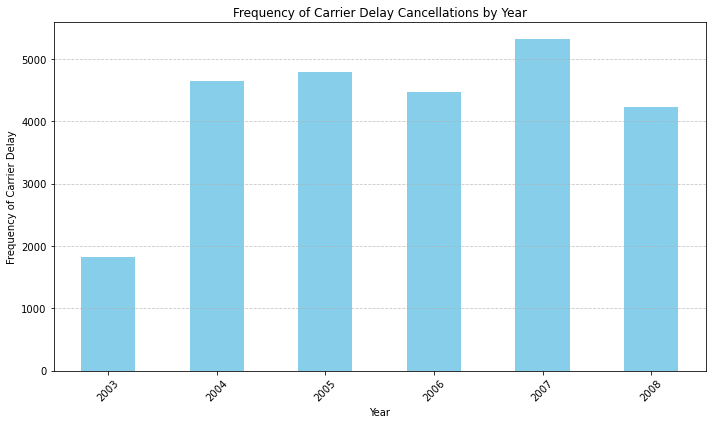

In [35]:
carrier_delay_counts = cancelcode_A['Year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
carrier_delay_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Carrier Delay Cancellations by Year')
plt.xlabel('Year')
plt.ylabel('Frequency of Carrier Delay')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [53]:
carrier_delay_counts

2003    1830
2004    4655
2005    4795
2006    4468
2007    5321
2008    4234
Name: Year, dtype: int64

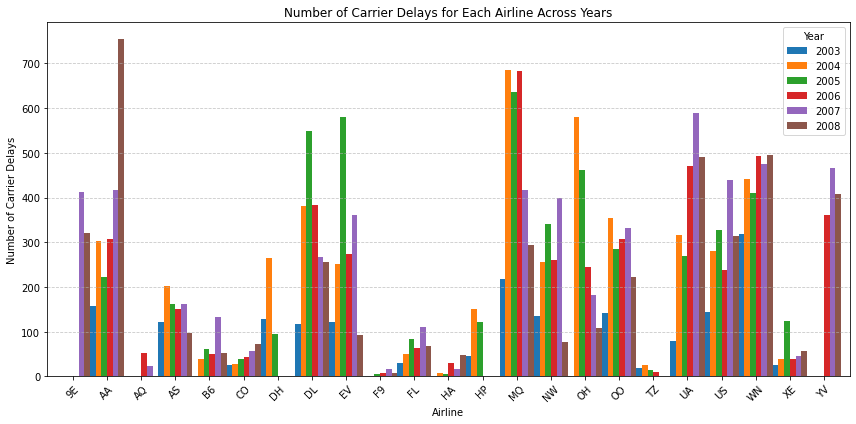

In [54]:
carrier_delays_count2 = cancelcode_A.groupby(['UniqueCarrier', 'Year']).size().unstack(fill_value=0)
carrier_delays_count2.plot(kind='bar', figsize=(12, 6), width=1.0)
plt.title('Number of Carrier Delays for Each Airline Across Years')
plt.xlabel('Airline')
plt.ylabel('Number of Carrier Delays')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [55]:
carrier_delays_count2

Year,2003,2004,2005,2006,2007,2008
UniqueCarrier,,,,,,
9E,0,0,0,0,412,320
AA,158,302,222,307,418,754
AQ,0,0,0,53,24,1
AS,122,203,162,151,162,97
B6,0,38,61,51,132,52
CO,26,28,39,43,56,73
DH,129,265,95,0,0,0
DL,117,382,549,384,267,255
EV,122,251,580,273,360,93


In [40]:
unique_years = cancelcode_A['Year'].unique()
print("List of unique years in the DataFrame:")
print(unique_years)

List of unique years in the DataFrame:
[2005 2008 2004 2007 2006 2003]


### Frequency of Weather Delay Cancellations by Year

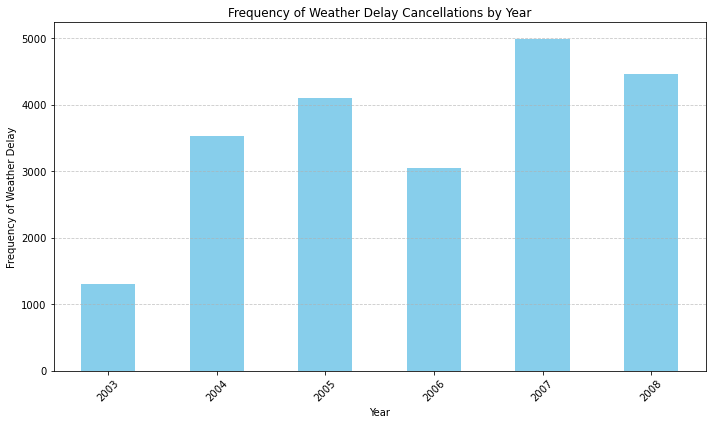

In [37]:
weather_delay_counts = cancelcode_B['Year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
weather_delay_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Weather Delay Cancellations by Year')
plt.xlabel('Year')
plt.ylabel('Frequency of Weather Delay')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [57]:
weather_delay_counts

2003    1308
2004    3530
2005    4096
2006    3052
2007    4986
2008    4460
Name: Year, dtype: int64

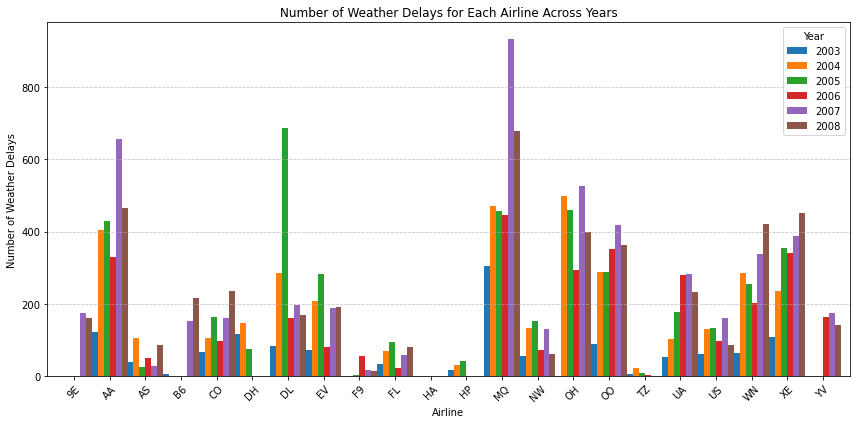

In [56]:
weather_delay_count2 = cancelcode_B.groupby(['UniqueCarrier', 'Year']).size().unstack(fill_value=0)
weather_delay_count2.plot(kind='bar', figsize=(12, 6), width=1.0)
plt.title('Number of Weather Delays for Each Airline Across Years')
plt.xlabel('Airline')
plt.ylabel('Number of Weather Delays')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

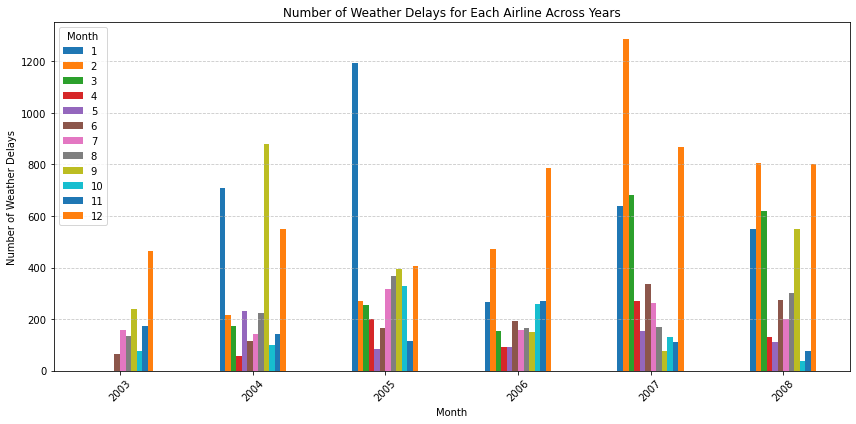

In [100]:
weather_delay_count3 = cancelcode_B.groupby(['Year', 'Month']).size().unstack(fill_value=0)
weather_delay_count3.plot(kind='bar', figsize=(12, 6), width=0.5)
plt.title('Number of Weather Delays for Each Airline Across Years')
plt.xlabel('Month')
plt.ylabel('Number of Weather Delays')
plt.xticks(rotation=45)
plt.legend(title='Month')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [102]:
# weather_delay_count3
weather_delay_count3['TotalDelaysPerYear'] = weather_delay_count3.sum(axis=1)
weather_delay_count3

Month,1,2,3,4,5,6,7,8,9,10,11,12,TotalDelaysPerYear
Year,,,,,,,,,,,,,
2003,0,0,0,0,0,64,157,136,238,78,172,463,1308.0
2004,707,214,175,57,231,114,144,222,877,98,141,550,3530.0
2005,1194,271,255,200,85,165,316,369,394,327,114,406,4096.0
2006,267,471,152,91,93,193,157,166,151,258,269,784,3052.0
2007,637,1286,683,271,155,338,262,171,76,130,111,866,4986.0
2008,551,806,619,129,111,274,201,302,548,39,77,803,4460.0


### Frequency of NAS Delay Cancellations by Year

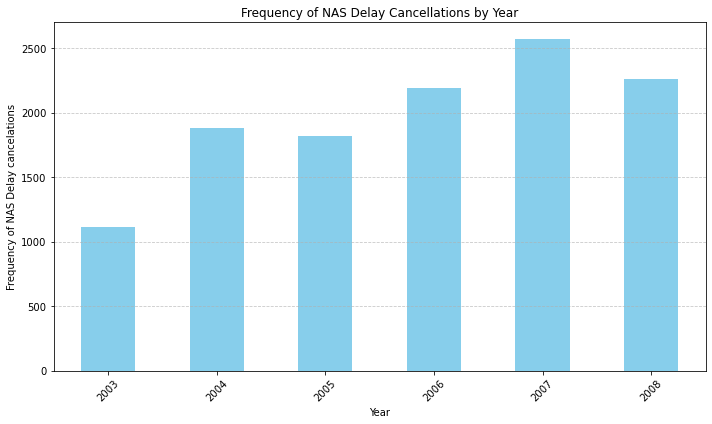

In [42]:
NAS_delay_counts = cancelcode_C['Year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
NAS_delay_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of NAS Delay Cancellations by Year')
plt.xlabel('Year')
plt.ylabel('Frequency of NAS Delay cancelations')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [59]:
NAS_delay_counts

2003    1117
2004    1882
2005    1818
2006    2194
2007    2571
2008    2264
Name: Year, dtype: int64

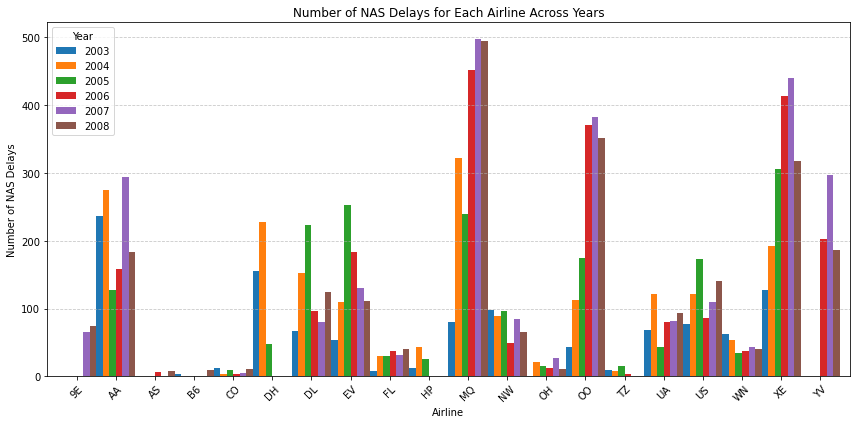

In [60]:
NAS_delay_count2 = cancelcode_C.groupby(['UniqueCarrier', 'Year']).size().unstack(fill_value=0)
NAS_delay_count2.plot(kind='bar', figsize=(12, 6), width=1.0)
plt.title('Number of NAS Delays for Each Airline Across Years')
plt.xlabel('Airline')
plt.ylabel('Number of NAS Delays')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [62]:
NAS_delay_count2

Year,2003,2004,2005,2006,2007,2008
UniqueCarrier,,,,,,
9E,0,0,0,0,66,74
AA,237,275,128,159,294,184
AS,0,0,0,7,1,8
B6,3,0,0,0,1,10
CO,12,4,10,4,5,11
DH,155,227,48,0,0,0
DL,67,153,223,96,80,124
EV,54,110,252,183,130,111
FL,8,30,30,38,32,41


### Frequency of Security Delay Cancellations by Year

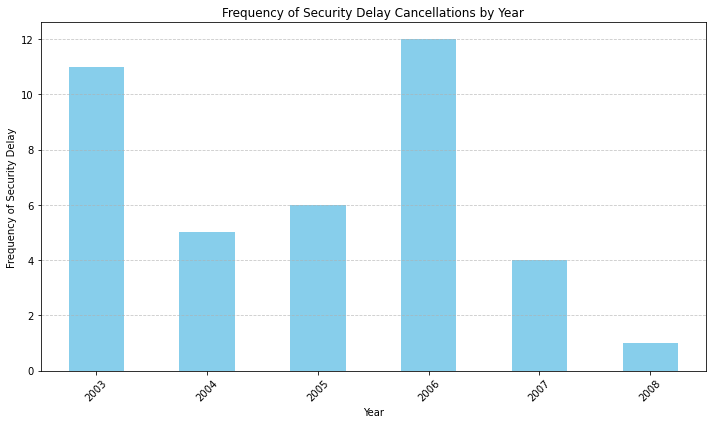

In [43]:
security_delay_counts = cancelcode_D['Year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
security_delay_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Security Delay Cancellations by Year')
plt.xlabel('Year')
plt.ylabel('Frequency of Security Delay')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [64]:
security_delay_counts

2003    11
2004     5
2005     6
2006    12
2007     4
2008     1
Name: Year, dtype: int64

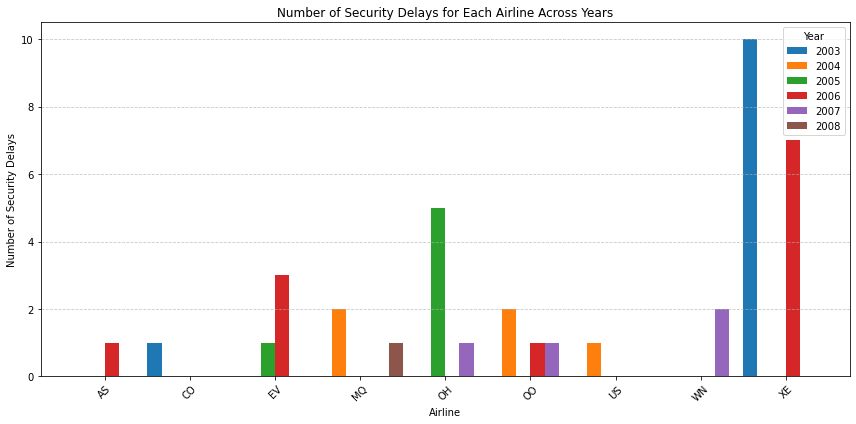

In [61]:
security_delay_count2 = cancelcode_D.groupby(['UniqueCarrier', 'Year']).size().unstack(fill_value=0)
security_delay_count2.plot(kind='bar', figsize=(12, 6), width=1.0)
plt.title('Number of Security Delays for Each Airline Across Years')
plt.xlabel('Airline')
plt.ylabel('Number of Security Delays')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [63]:
security_delay_count2

Year,2003,2004,2005,2006,2007,2008
UniqueCarrier,,,,,,
AS,0,0,0,1,0,0
CO,1,0,0,0,0,0
EV,0,0,1,3,0,0
MQ,0,2,0,0,0,1
OH,0,0,5,0,1,0
OO,0,2,0,1,1,0
US,0,1,0,0,0,0
WN,0,0,0,0,2,0
XE,10,0,0,7,0,0


In [11]:
normal_flights = airline_df[airline_df['Cancelled'] == 0]
normal_flights.head()

,ActualElapsedTime,AirTime,ArrDelay,ArrTime,CRSArrTime,CRSDepTime,CRSElapsedTime,CancellationCode,Cancelled,CarrierDelay,...,Month,NASDelay,Origin,SecurityDelay,TailNum,TaxiIn,TaxiOut,UniqueCarrier,WeatherDelay,Year
0,154.0,122.0,90.0,1850.0,1720,1455,145.0,NaN,0,0.0,...,6,23.0,ORD,0.0,N293AA,8.0,24.0,AA,0.0,2006
1,159.0,125.0,59.0,1703.0,1604,1510,114.0,NaN,0,NaN,...,9,NaN,DTW,NaN,N8921E,19.0,15.0,NW,NaN,1997
3,70.0,NaN,80.0,20.0,2300,2100,60.0,NaN,0,NaN,...,2,NaN,MDW,NaN,NaN,NaN,NaN,ML (1),NaN,1991
4,150.0,135.0,5.0,2030.0,2025,1740,165.0,NaN,0,NaN,...,2,NaN,PHL,NaN,N512AU,3.0,12.0,US,NaN,1997
5,110.0,NaN,10.0,1450.0,1440,1300,100.0,NaN,0,NaN,...,2,NaN,BDL,NaN,NaN,NaN,NaN,CO,NaN,1989


### Separating into cancelled flights and normal flights that were not affected by cancellations

### Things to take note:
1. ActualElapsedTime - CSRElapsedTime = ArrDelay - DepDelay
2. ArrDelay = CarrierDelay + LateAircraftDelay + NASDelay + SecurityDelay + WeatherDelay

In [12]:
normal_flights.loc[:, 'TotalDelayDuration'] = normal_flights['ArrDelay'] - normal_flights['DepDelay']

total_delay = normal_flights["TotalDelayDuration"]
normal_flights.drop(labels=["TotalDelayDuration"], axis=1, inplace=True)
normal_flights.insert(0, "TotalDelayDuration", total_delay)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [13]:
normal_flights.head()

,TotalDelayDuration,ActualElapsedTime,AirTime,ArrDelay,ArrTime,CRSArrTime,CRSDepTime,CRSElapsedTime,CancellationCode,Cancelled,...,Month,NASDelay,Origin,SecurityDelay,TailNum,TaxiIn,TaxiOut,UniqueCarrier,WeatherDelay,Year
0,9.0,154.0,122.0,90.0,1850.0,1720,1455,145.0,NaN,0,...,6,23.0,ORD,0.0,N293AA,8.0,24.0,AA,0.0,2006
1,45.0,159.0,125.0,59.0,1703.0,1604,1510,114.0,NaN,0,...,9,NaN,DTW,NaN,N8921E,19.0,15.0,NW,NaN,1997
3,10.0,70.0,NaN,80.0,20.0,2300,2100,60.0,NaN,0,...,2,NaN,MDW,NaN,NaN,NaN,NaN,ML (1),NaN,1991
4,-15.0,150.0,135.0,5.0,2030.0,2025,1740,165.0,NaN,0,...,2,NaN,PHL,NaN,N512AU,3.0,12.0,US,NaN,1997
5,10.0,110.0,NaN,10.0,1450.0,1440,1300,100.0,NaN,0,...,2,NaN,BDL,NaN,NaN,NaN,NaN,CO,NaN,1989


In [15]:
useful_df = normal_flights.dropna(subset=["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"])
useful_df.head()

,TotalDelayDuration,ActualElapsedTime,AirTime,ArrDelay,ArrTime,CRSArrTime,CRSDepTime,CRSElapsedTime,CancellationCode,Cancelled,...,Month,NASDelay,Origin,SecurityDelay,TailNum,TaxiIn,TaxiOut,UniqueCarrier,WeatherDelay,Year
0,9.0,154.0,122.0,90.0,1850.0,1720,1455,145.0,NaN,0,...,6,23.0,ORD,0.0,N293AA,8.0,24.0,AA,0.0,2006
8,-1.0,293.0,272.0,-1.0,1543.0,1544,750,294.0,NaN,0,...,5,0.0,LAX,0.0,N788UA,8.0,13.0,UA,0.0,2007
13,1.0,121.0,101.0,-6.0,809.0,815,715,120.0,NaN,0,...,3,0.0,HOU,0.0,N725SW,14.0,6.0,WN,0.0,2007
18,6.0,162.0,142.0,5.0,1001.0,956,820,156.0,NaN,0,...,10,0.0,MEM,0.0,N970SW,9.0,11.0,OO,0.0,2006
19,-21.0,113.0,92.0,-25.0,1534.0,1559,1345,134.0,NaN,0,...,8,0.0,ATL,0.0,N17620,11.0,10.0,CO,0.0,2004


In [16]:
useful_df.shape[0]

2690088

In [17]:
print (f"Percentage of flights without delay information: {round((1 - useful_df.shape[0] / normal_flights.shape[0]) * 100, 2)}%")

Percentage of flights without delay information: 72.26%


In [18]:
print (f"Percentage of flights with delay information: {round(useful_df.shape[0] / normal_flights.shape[0] * 100, 2)}%")

Percentage of flights with delay information: 27.74%


### Seeing distribution of delay times for each factor

In [19]:
delay_factors = ["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"]

In [20]:
melted_flights = pd.melt(useful_df, id_vars=["ArrDelay"], value_vars=delay_factors, var_name="DelayType", value_name="DelayDuration")

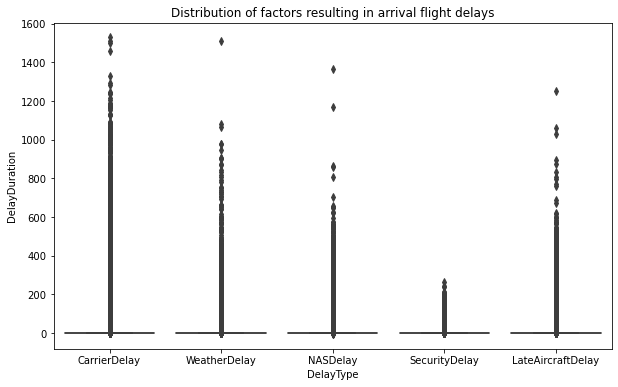

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted_flights, x="DelayType", y="DelayDuration")
plt.title("Distribution of factors resulting in arrival flight delays")
plt.show()

In [23]:
useful_df.to_csv("flights_with_delay_data.csv", index=False)

In [24]:
normal_flights.to_csv("flights_without_cancellation_data.csv", index=False)

In [25]:
cancelled_flights.to_csv("flights_with_cancellation_data.csv", index=False)